# Data Exploration With Notebooks

### Prepared by Nyalleng Moorosi
##### June 21st 2017

### Introduction

**Preliminaries: **  Use Shift+Enter to run the notebook cells.

This course will introduce you to working with python in Jupyter Notebooks. The notebook will walk you through some of the basic and first steps in the data science workflow. We will begin with loading the data and finish off with some exploratory visualizations.



### The Problem

Suppose we have been tasked by the police in the City of Chicago to understand crime patterns so that we may assist them in their planning and resource allocation. Specifically they want to understand which places are hotspots, when the most crimes occur, for each crime when is it most prevalent? etc... 

### The Data 

For this we are given data in CSV format with the following rows: 
* ID - case ID
* Case Number 
* Date 
* Block 
* Community Area
* Primary Type
* Description
* Location Description
* Arrest
* Domestic
* Community Area
* Updated On
* Latitude and Longitude

etc...

#### Answering the question

The first step to any data analysis project is to define the **question** or problem we're looking to solve, and to define a **measure (or set of measures)** for our success at solving that task. The data analysis checklist has us answer a handful of questions to accomplish that, so let's work through those questions.

Did you 

* **specify the type of data analytic question** (e.g. exploration, association causality) before touching the data?
We are trying to understand crime patterns.  Which matrices should we use?

* **Did you understand the context for the question and the scientific or business application?**
We wish to build a visualization tool to show crime patterns in the city. This analysis may in the future be included as part of a tactical app for the police that may be deployed on desktops and mobile apps. We also know that this will require lots of data crunching and this will dictate that we optimize our method later on.

* **Do we have enough data (quantity) and do you have the right type of data to answer the question?** 

#### Section 1: Load Necessary Modules

Import necessary modules. Also might want to change directories where the source code is stored. If you find that you need another module later, you can add it in the cell from which you will start need it but for neatness and consistency, it is best to have all your imports in one cell.

The libraries/modules loaded below are standard modules that you will almost always use. These are included in the Anaconda distribution so you won't need to install anything more for now.

* **datetime** Allows you to work with date date objects
* **pandas**  An efficient table-like (Data frame) structure that allows for quick storage and retrieval
* **matplotlib** A library that contains several plotting tools
* **numpy** An efficient library for numerical computing in Python


In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##### In line plotting:

Include the following so that all plots display in the notebook. You may also set a standard figure size here for all of your figures.  You can always override the fig size when you do the actual plotting later.

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

Populating the interactive namespace from numpy and matplotlib


Import the data. What you have after this is a Pandas dataframe.

In [2]:
file_path = '../data/test.csv'
crimes = pd.read_csv(file_path)

EmptyDataError: No columns to parse from file

In [ ]:
pd.

#### Step 1: Have a look at your data

Check the size of your data. This will let you know that all of your file was read in.

In [10]:
shape(crimes)

(380391, 22)

In [39]:
crimes[:3]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10760967,HZ524984,12/31/2015 12:01:00 AM,057XX S MORGAN ST,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,16.0,68,05,NaN,NaN,2015,11/22/2016 03:51:04 PM,NaN,NaN,NaN
1,10363705,HY555654,12/31/2015 12:01:00 AM,060XX S MICHIGAN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,20.0,40,08B,1178195.0,1864912.0,2015,01/07/2016 04:14:34 PM,41.784631,-87.622204,"(41.784630525, -87.622203978)"
2,10364060,HY555835,12/31/2015 12:01:00 AM,083XX S BENNETT AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,...,8.0,45,06,1190312.0,1850037.0,2015,01/07/2016 04:14:34 PM,41.743529,-87.578257,"(41.743528707, -87.578257475)"


In [36]:
len(crimes)

380391

Look at the columns so that you know the types of data in your dataset

In [12]:
crimes.columns

Index([u'ID', u'Case Number', u'Date', u'Block', u'IUCR', u'Primary Type',
       u'Description', u'Location Description', u'Arrest', u'Domestic',
       u'Beat', u'District', u'Ward', u'Community Area', u'FBI Code',
       u'X Coordinate', u'Y Coordinate', u'Year', u'Updated On', u'Latitude',
       u'Longitude', u'Location'],
      dtype='object')

Check the contents of your data frame. Great way to see the types of data in your dataset.

In [35]:
crimes[0:10]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Datetime,Month,Hour,Day
0,10760967,HZ524984,2015-12-31,057XX S MORGAN ST,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,NaN,2015,11/22/2016 03:51:04 PM,NaN,NaN,NaN,2015-12-31 00:01:00,12,0,3
1,10363705,HY555654,2015-12-31,060XX S MICHIGAN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,1864912.0,2015,01/07/2016 04:14:34 PM,41.784631,-87.622204,"(41.784630525, -87.622203978)",2015-12-31 00:01:00,12,0,3
2,10364060,HY555835,2015-12-31,083XX S BENNETT AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,...,1850037.0,2015,01/07/2016 04:14:34 PM,41.743529,-87.578257,"(41.743528707, -87.578257475)",2015-12-31 00:01:00,12,0,3
3,10364173,HY555764,2015-12-31,043XX W WILSON AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,...,1930217.0,2015,01/07/2016 04:14:34 PM,41.964496,-87.736777,"(41.964495979, -87.736777131)",2015-12-31 00:01:00,12,0,3
4,10364916,HZ100359,2015-12-31,016XX E 91ST PL,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,...,1844634.0,2015,01/07/2016 04:14:34 PM,41.728738,-87.583801,"(41.728737511, -87.583801325)",2015-12-31 00:01:00,12,0,3
5,10368977,HZ105043,2015-12-31,002XX E 77TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,1854007.0,2015,01/15/2016 11:08:45 AM,41.754686,-87.619280,"(41.754685859, -87.619280171)",2015-12-31 00:01:00,12,0,3
6,10369019,HZ104826,2015-12-31,053XX S HOYNE AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,...,1869284.0,2015,01/15/2016 11:08:45 AM,41.796954,-87.676821,"(41.796953657, -87.676821118)",2015-12-31 00:01:00,12,0,3
7,10391258,HZ128086,2015-12-31,015XX W 77TH ST,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,RESIDENCE,False,False,...,1853666.0,2015,01/28/2016 03:54:45 PM,41.754010,-87.662434,"(41.754010145, -87.662434427)",2015-12-31 00:01:00,12,0,3
8,10370589,HZ106586,2015-12-31,016XX W OGDEN AVE,0810,THEFT,OVER $500,APARTMENT,False,False,...,1899448.0,2015,02/18/2016 03:46:40 PM,41.879682,-87.668201,"(41.879682085, -87.668201247)",2015-12-31 00:01:00,12,0,3
9,10440734,HZ179342,2015-12-31,014XX W 76TH ST,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,APARTMENT,False,False,...,1854350.0,2015,04/15/2016 03:49:27 PM,41.755870,-87.659556,"(41.755870407, -87.659556354)",2015-12-31 00:01:00,12,0,3


#### Step 2: Some basic analysis of your data

For each column, you can check the unique values (Set of values that that attribute can take).

In [13]:
pd.Series(crimes['Primary Type'].values.ravel()).unique()

array(['BURGLARY', 'BATTERY', 'THEFT', 'DECEPTIVE PRACTICE',
       'CRIMINAL DAMAGE', 'ROBBERY', 'PUBLIC PEACE VIOLATION', 'ASSAULT',
       'NARCOTICS', 'OTHER OFFENSE', 'MOTOR VEHICLE THEFT',
       'OFFENSE INVOLVING CHILDREN', 'CRIMINAL TRESPASS',
       'CRIM SEXUAL ASSAULT', 'SEX OFFENSE', 'ARSON', 'WEAPONS VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'OBSCENITY', 'INTIMIDATION',
       'HOMICIDE', 'KIDNAPPING', 'LIQUOR LAW VIOLATION', 'PROSTITUTION',
       'STALKING', 'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'CONCEALED CARRY LICENSE VIOLATION', 'GAMBLING', 'NON - CRIMINAL',
       'OTHER NARCOTIC VIOLATION', 'HUMAN TRAFFICKING', 'PUBLIC INDECENCY'], dtype=object)

Group the crimes by the type of crime.  Returns the data grouped by the type of crime.

In [14]:
by_crime = crimes.groupby('Primary Type')

** Better use of the groupby:** This gives the number of IDs per type of crime. The **agg** function lets you aggregate the results in some way. Here we use len, to count the number of items per group. One could use sum, average etc... Any python aggregation function will do. Just make sure the results make sense, in this case sum or average wouldn't make sense.

In [15]:
by_crime = crimes.groupby('Primary Type')['ID'].agg(len).reset_index()
by_crime

,Primary Type,ID
0,ARSON,716
1,ASSAULT,27103
2,BATTERY,71579
3,BURGLARY,19903
4,CONCEALED CARRY LICENSE VIOLATION,62
5,CRIM SEXUAL ASSAULT,2107
6,CRIMINAL DAMAGE,43611
7,CRIMINAL TRESPASS,9353
8,DECEPTIVE PRACTICE,25381
9,GAMBLING,257


In [16]:
crimes.groupby('Arrest')['ID'].agg(len).reset_index()

,Arrest,ID
0,False,306280
1,True,74111


#### Step 3: Modify and Clean your Data

Sometimes you need to edit some columns to hold intermediate results that you know you will user, over and over. Below is an example of doing that with time. In this exploration you may also have wanted to do with locations.

Dates(time) are almost always necessary when doing analytics. Change the string values into date datatypes. You may further break that date into months, day of week, hour, week of year...etc

In [17]:
crimes['Datetime'] = pd.to_datetime(crimes['Date'])
crimes['Date'] = crimes['Datetime'].apply(lambda x:x.date())
crimes['Month'] = crimes['Datetime'].apply(lambda x:x.month)
crimes['Hour'] = crimes['Datetime'].apply(lambda x:x.hour)
crimes['Day'] = crimes['Datetime'].apply(lambda x:x.weekday())

In [19]:
update_time = crimes['Datetime'] - pd.to_datetime(crimes['Updated On'])

In [20]:
update_time[:30]

0    -328 days +08:09:56
1      -8 days +07:46:26
2      -8 days +07:46:26
3      -8 days +07:46:26
4      -8 days +07:46:26
5     -16 days +12:52:15
6     -16 days +12:52:15
7     -29 days +08:06:15
8     -50 days +08:14:20
9    -107 days +08:11:33
10   -102 days +08:12:20
11     -8 days +07:55:26
12     -8 days +07:56:26
13     -8 days +07:59:26
14     -8 days +08:00:26
15     -8 days +08:00:26
16     -8 days +08:00:26
17    -19 days +08:23:00
18    -16 days +13:11:15
19     -8 days +08:05:26
20     -8 days +08:13:26
21    -16 days +13:19:15
22     -8 days +08:15:26
23     -8 days +08:15:26
24     -8 days +08:15:26
25     -8 days +08:15:26
26     -8 days +08:15:26
27     -8 days +08:15:26
28    -11 days +16:15:21
29     -8 days +08:20:26
dtype: timedelta64[ns]

In [21]:
crimes.shape

(380391, 26)

In [22]:
crimes[:5]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Datetime,Month,Hour,Day
0,10760967,HZ524984,2015-12-31,057XX S MORGAN ST,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,NaN,2015,11/22/2016 03:51:04 PM,NaN,NaN,NaN,2015-12-31 00:01:00,12,0,3
1,10363705,HY555654,2015-12-31,060XX S MICHIGAN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,1864912.0,2015,01/07/2016 04:14:34 PM,41.784631,-87.622204,"(41.784630525, -87.622203978)",2015-12-31 00:01:00,12,0,3
2,10364060,HY555835,2015-12-31,083XX S BENNETT AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,...,1850037.0,2015,01/07/2016 04:14:34 PM,41.743529,-87.578257,"(41.743528707, -87.578257475)",2015-12-31 00:01:00,12,0,3
3,10364173,HY555764,2015-12-31,043XX W WILSON AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,...,1930217.0,2015,01/07/2016 04:14:34 PM,41.964496,-87.736777,"(41.964495979, -87.736777131)",2015-12-31 00:01:00,12,0,3
4,10364916,HZ100359,2015-12-31,016XX E 91ST PL,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,...,1844634.0,2015,01/07/2016 04:14:34 PM,41.728738,-87.583801,"(41.728737511, -87.583801325)",2015-12-31 00:01:00,12,0,3


In [34]:
date_and_type = crimes[['Date','Primary Type']]
date_and_type[:20]

,Date,Primary Type
0,2015-12-31,BURGLARY
1,2015-12-31,BATTERY
2,2015-12-31,THEFT
3,2015-12-31,THEFT
4,2015-12-31,DECEPTIVE PRACTICE
5,2015-12-31,CRIMINAL DAMAGE
6,2015-12-31,DECEPTIVE PRACTICE
7,2015-12-31,DECEPTIVE PRACTICE
8,2015-12-31,THEFT
9,2015-12-31,DECEPTIVE PRACTICE


#### Step 4: Visualize some of your results

Some plots to visualize the data. This step helps you build intuition about the types of models you will need for your anaylisis. 
Here the data is grouped by type and location(ward) and the red scatter is hour and ward)

 **I. Filtering by a value in a coloum**

In [23]:
thefts = crimes[crimes['Primary Type'] == 'THEFT']
thefts[:4]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Datetime,Month,Hour,Day
2,10364060,HY555835,2015-12-31,083XX S BENNETT AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,...,1850037.0,2015,01/07/2016 04:14:34 PM,41.743529,-87.578257,"(41.743528707, -87.578257475)",2015-12-31 00:01:00,12,0,3
3,10364173,HY555764,2015-12-31,043XX W WILSON AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,...,1930217.0,2015,01/07/2016 04:14:34 PM,41.964496,-87.736777,"(41.964495979, -87.736777131)",2015-12-31 00:01:00,12,0,3
8,10370589,HZ106586,2015-12-31,016XX W OGDEN AVE,0810,THEFT,OVER $500,APARTMENT,False,False,...,1899448.0,2015,02/18/2016 03:46:40 PM,41.879682,-87.668201,"(41.879682085, -87.668201247)",2015-12-31 00:01:00,12,0,3
12,10363716,HY555630,2015-12-31,046XX W NORTH AVE,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,False,...,1910225.0,2015,01/07/2016 04:14:34 PM,41.909664,-87.742729,"(41.909664252, -87.742728815)",2015-12-31 00:11:00,12,0,3


** III. Further Grouping/Slicing and visualization ** 

Grouping data into three dimensions to allow for density mapping

In [24]:
by_hour = thefts.groupby(['Month', 'Hour'])['ID'].agg(len).reset_index()

In [25]:
by_hour[:20]

,Month,Hour,ID
0,1,0,339
1,1,1,197
2,1,2,185
3,1,3,152
4,1,4,121
5,1,5,110
6,1,6,129
7,1,7,203
8,1,8,320
9,1,9,385


In [26]:
df = by_hour.pivot(index= 'Month',  columns ='Hour', values='ID')

In [28]:
df = df.fillna(0.0)
df

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Month,,,,,,,,,,,,,,,,,,,,,
1,339,197,185,152,121,110,129,203,320,385,...,593,625,617,643,677,546,445,400,392,296
2,260,165,142,124,108,98,118,198,278,358,...,534,573,509,576,590,496,405,346,317,261
3,340,184,167,135,107,105,156,214,290,412,...,561,640,568,622,593,501,441,413,366,256
4,357,197,190,147,102,85,156,236,311,378,...,584,574,591,614,604,574,488,384,366,283
5,366,232,208,140,112,117,162,255,365,461,...,681,684,614,647,657,625,505,437,437,369
6,278,194,141,117,97,75,115,143,230,362,...,478,445,484,426,448,424,381,336,326,236
7,249,157,132,113,89,70,116,132,204,226,...,333,345,347,358,327,326,293,284,246,240
8,237,166,128,94,79,81,106,147,206,243,...,358,340,344,364,408,307,307,269,266,244
9,215,126,127,104,89,76,100,148,239,254,...,368,361,349,338,339,307,312,275,257,159


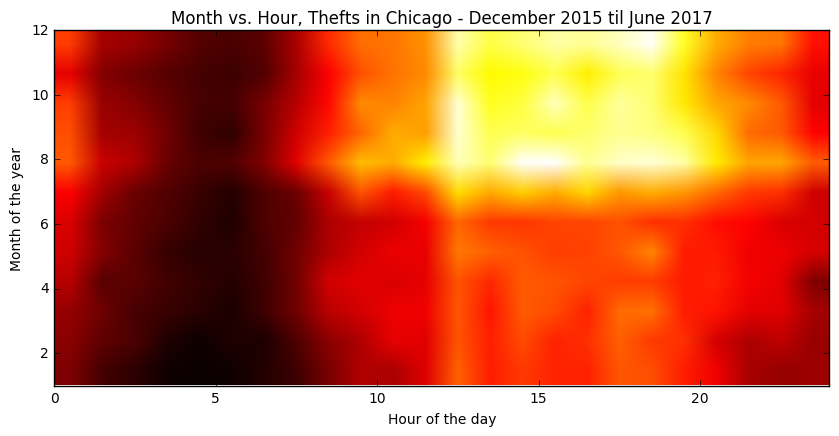

In [29]:
fig, ax = plt.subplots()
ax.autoscale_view()
fig.canvas.draw()
ax.set_xlabel('Hour of the day')
ax.set_ylabel('Month of the year')
ax.set_title('Month vs. Hour, Thefts in Chicago - December 2015 til June 2017')
plt.imshow(df, cmap=matplotlib.cm.hot,extent=[0,24,1,12])

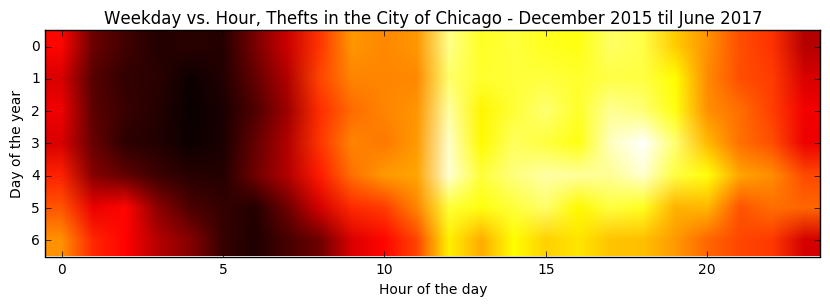

In [30]:
by_day = thefts.groupby(['Day', 'Hour'])['ID'].agg(len).reset_index()
df = by_day.pivot(index= 'Day',  columns ='Hour', values='ID')
df = df.fillna(0.0)
fig, ax = plt.subplots()
ax.set_xlabel('Hour of the day')
ax.set_ylabel('Day of the year')
ax.set_title('Weekday vs. Hour, Thefts in the City of Chicago - December 2015 til June 2017')
ax.autoscale_view()
fig.canvas.draw()
plt.imshow(df, cmap=matplotlib.cm.hot)

** IV.  Compare theft patterns to battery patterns **

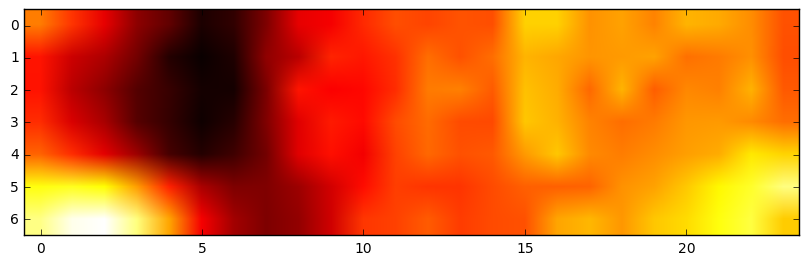

In [31]:
battery = crimes[crimes['Primary Type'] == 'BATTERY']
by_day = battery.groupby(['Day', 'Hour'])['ID'].agg(len).reset_index()
df = by_day.pivot(index= 'Day',  columns ='Hour', values='ID')
df = df.fillna(0.0)
fig, ax = plt.subplots()
ax.autoscale_view()
fig.canvas.draw()
plt.imshow(df, cmap=matplotlib.cm.hot)